In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances

In [3]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

,y1,y2,y3,y4
0,1.06,0.08,0.00,1.03
1,1.06,1.10,1.72,0.80
2,1.06,-0.12,-0.08,1.04
3,1.06,0.91,1.27,0.86
4,1.06,1.00,1.07,1.11
...,...,...,...,...
195,1.06,0.98,1.06,0.93
196,1.06,0.81,1.79,1.10
197,1.06,0.87,1.19,0.86
198,1.06,0.17,0.01,1.04


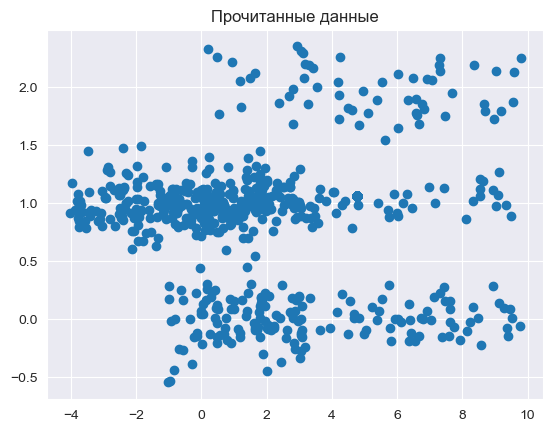

In [65]:
#Проверяем размерность
print(x_data.shape)
print(y_data.shape)

In [66]:
# import matplotlib.pyplot as plt
from scipy.spatial import distance

euclidean = distance.cdist(x_data, y_data, 'euclidean')  ## Возвращает матрицу всех попарных расстояний.
euclidean

[[ 8.35920451  6.88867186  8.45021893 ...  7.3089671   8.34617278
   6.67013493]
 [10.57861049  9.02169053 10.6688378  ...  9.47748384 10.56688696
   8.78076306]
 [10.88258701  9.28463246 10.97686658 ...  9.75349168 10.86897419
   9.04014934]
 ...
 [10.27902233  8.75603792 10.366224   ...  9.20077171 10.26866106
   8.51842122]
 [10.1140002   8.58586629 10.20242618 ...  9.03162776 10.1030045
   8.34876039]
 [ 8.62035382  7.12355248  8.7127378  ...  7.55335687  8.60681126
   6.90058693]]


### Матрица расстояний
![Основные функции растояний](img.png)

## Евклидово расстояние - 
### Числовые данные с высокой размерностью: Евклидово расстояние может страдать от "проклятия размерности", когда расстояния становятся менее значимыми

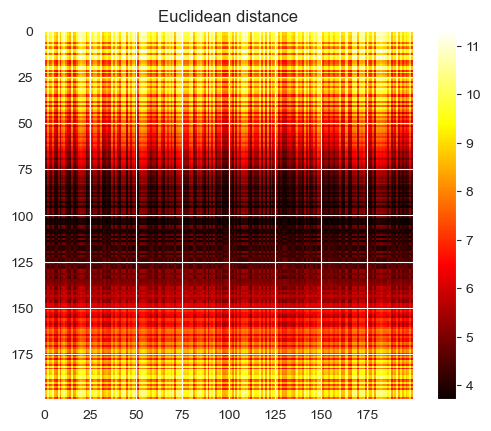

In [67]:
plt.imshow(euclidean,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Euclidean distance', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=1000, bbox_inches='tight')
plt.show()

###  Cosine similarity
#### Измеряет косинус угла между векторами. Полезно для текстовых данных или других многомерных данных, где величина векторов менее важна, чем их направление.

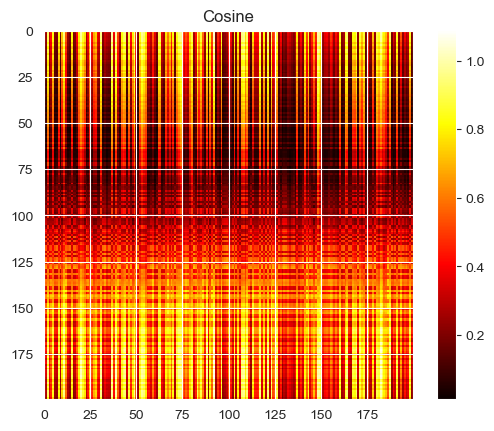

In [68]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cos')

plt.imshow(d,cmap='hot',interpolation='nearest')

plt.colorbar()

plt.title('Cosine', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

### Манхэттенская метрика
#### Часто используется в высокоразмерных пространствах из-за лучшей устойчивости к выбросам.

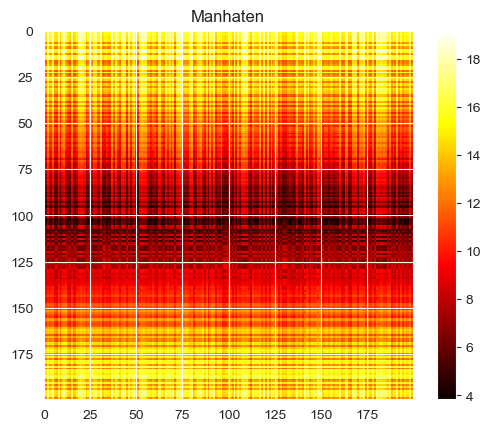

In [69]:
from numpy import array
from scipy.spatial import distance

d = distance.cdist(x_data, y_data, 'cityblock')

plt.imshow(d,cmap='hot',interpolation='nearest')
plt.colorbar()

plt.title('Manhaten', fontsize=12)

plt.savefig('distance_matrix_01.png', dpi=100, bbox_inches='tight')

plt.show()

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from numpy import float64

x_data = pd.read_csv("x_data.csv", delimiter='	', dtype=float64)
y_data = pd.read_csv("y_data.csv", delimiter='	', dtype=float64)
x_data
y_data

### Расчет матрицы расстояний

In [4]:
# Евклидовы расстояния
x_distances = squareform(pdist(x_data, metric='euclidean'))  # Матрица расстояний для X
y_distances = squareform(pdist(y_data, metric='euclidean'))  # Матрица расстояний для Y

# Вывод матриц расстояний
print("Distance Matrix for X data")
print(x_distances)

print("Distance Matrix for Y data")
print(y_distances)

Distance Matrix for X data
[[0.         2.42472679 2.74718037 ... 2.12776878 1.93868512 0.30033315]
 [2.42472679 0.         0.46162756 ... 0.39204592 0.51205468 2.14254522]
 [2.74718037 0.46162756 0.         ... 0.84911719 0.93322023 2.45352807]
 ...
 [2.12776878 0.39204592 0.84911719 ... 0.         0.20469489 1.86048381]
 [1.93868512 0.51205468 0.93322023 ... 0.20469489 0.         1.66640331]
 [0.30033315 2.14254522 2.45352807 ... 1.86048381 1.66640331 0.        ]]
Distance Matrix for Y data
[[0.         2.0128835  0.21563859 ... 1.43843665 0.09110434 2.21567146]
 [2.0128835  0.         2.18769285 ... 0.58086143 1.9612751  0.41097445]
 [0.21563859 2.18769285 0.         ... 1.62030861 0.30364453 2.36822719]
 ...
 [1.43843665 0.58086143 1.62030861 ... 0.         1.38376299 0.87011493]
 [0.09110434 1.9612751  0.30364453 ... 1.38376299 0.         2.1761204 ]
 [2.21567146 0.41097445 2.36822719 ... 0.87011493 2.1761204  0.        ]]


### Расчет матрицы близостей и построение графовой модели

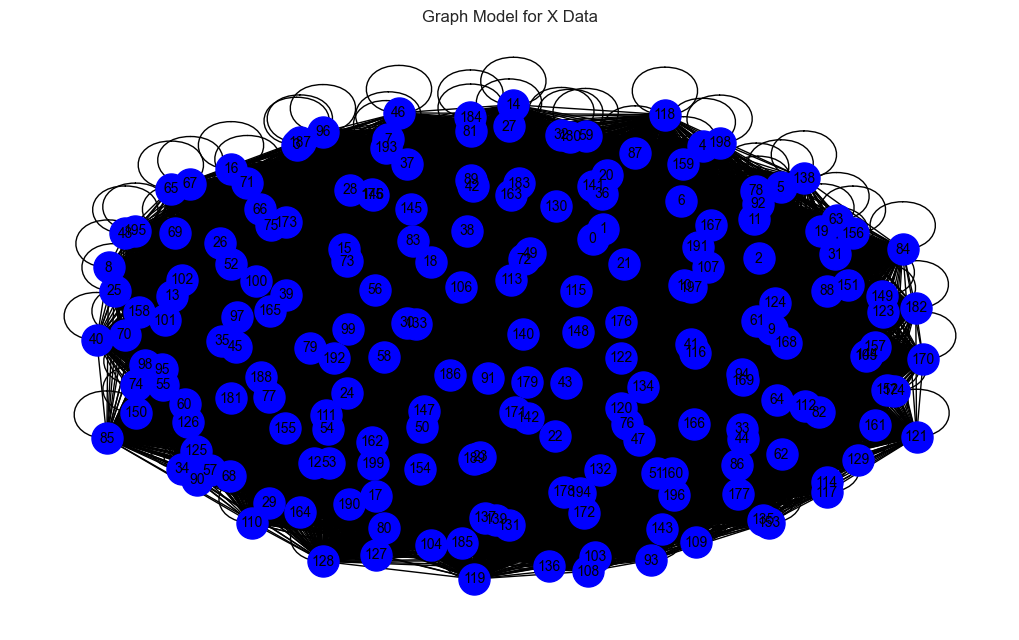

In [6]:
# Преобразование расстояний в близости (пример с использованием cosine_similarity)
x_similarity = cosine_similarity(x_data)
y_similarity = cosine_similarity(y_data)

# Построение графовой модели (полного, взвешенного, неориентированного)
x_graph = nx.Graph(x_similarity)
y_graph = nx.Graph(y_similarity)

# Визуализация графа (пример для X данных)
plt.figure(figsize=(10, 6))
nx.draw(x_graph, with_labels=True, node_color='blue', node_size=500, font_size=10)
plt.title("Graph Model for X Data")
plt.show()

## 1. Кластеризация на 2 кластера

### 1.1 Алгоритмы кластеризации:

#### Метод иерархической кластеризации (Ward Linkage)

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Ward Linkage для данных напрямую (без precomputed матрицы)
hierarchical_clust_x = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_clust_y = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Фит и предсказания кластеров
x_clusters_hierarchical = hierarchical_clust_x.fit_predict(x_similarity)
y_clusters_hierarchical = hierarchical_clust_y.fit_predict(y_similarity)

print("X clusters with Ward Linkage:", x_clusters_hierarchical)
print("Y clusters with Ward Linkage:", y_clusters_hierarchical)


X clusters with Ward Linkage: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with Ward Linkage: [1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


#### K-means

In [8]:
# K-means для матрицы расстояний
kmeans = KMeans(n_clusters=2, random_state=42)
x_clusters_kmeans = kmeans.fit_predict(x_distances)
y_clusters_kmeans = kmeans.fit_predict(y_distances)

print("X clusters with K-means:", x_clusters_kmeans)
print("Y clusters with K-means:", y_clusters_kmeans)

C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


X clusters with K-means: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with K-means: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### EM алгоритм

In [9]:
# EM алгоритм (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=2, random_state=42)
x_clusters_em = gmm.fit_predict(x_distances)
y_clusters_em = gmm.fit_predict(y_distances)

print("X clusters with EM:", x_clusters_em)
print("Y clusters with EM:", y_clusters_em)

X clusters with EM: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with EM: [0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1]


#### Спектральная кластеризация

In [10]:
from sklearn.cluster import SpectralClustering

# Пример использования Normalized Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
x_clusters_spectral = spectral.fit_predict(x_similarity)
y_clusters_spectral = spectral.fit_predict(y_similarity)

print("X clusters with Spectral Clustering:", x_clusters_spectral)
print("Y clusters with Spectral Clustering:", y_clusters_spectral)

X clusters with Spectral Clustering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Y clusters with Spectral Clustering: [1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1
 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0]


### 1.2 Сравнение попарных разбиений с помощью RAND индекса

In [23]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(x_clusters_hierarchical, x_clusters_kmeans)
rand_index_1_3 = rand_score(x_clusters_hierarchical, x_clusters_em)
rand_index_1_4 = rand_score(x_clusters_hierarchical, x_clusters_spectral)

print("RAND Index between Hierarchical and K-means for X:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index_1_4)

rand_index_2_3 = rand_score(x_clusters_kmeans, x_clusters_em)
rand_index_2_4 = rand_score(x_clusters_kmeans, x_clusters_spectral)

print()
print("RAND Index between K-means and EM for X:", rand_index_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index_2_4)

rand_index_3_4 = rand_score(x_clusters_em, x_clusters_spectral)

print()
print("RAND Index between EM and Spectral for X:", rand_index_3_4)

RAND Index between Hierarchical and K-means for X: 0.6607537688442211
RAND Index between Hierarchical and EM for X: 0.6607537688442211
RAND Index between Hierarchical and Spectral for X: 0.7508040201005025

RAND Index between K-means and EM for X: 1.0
RAND Index between K-means and Spectral for X: 0.8032160804020101

RAND Index between EM and Spectral for X: 0.8032160804020101


In [25]:
# Сравнение кластеризаций (например, для X данных)
rand_index_1_2 = rand_score(y_clusters_hierarchical, y_clusters_kmeans)
rand_index_1_3 = rand_score(y_clusters_hierarchical, y_clusters_em)
rand_index_1_4 = rand_score(y_clusters_hierarchical, y_clusters_spectral)

print("RAND Index between Hierarchical and K-means for X:", rand_index_1_2)
print("RAND Index between Hierarchical and EM for X:", rand_index_1_3)
print("RAND Index between Hierarchical and Spectral for X:", rand_index_1_4)

rand_index_2_3 = rand_score(y_clusters_kmeans, y_clusters_em)
rand_index_2_4 = rand_score(y_clusters_kmeans, y_clusters_spectral)

print()
print("RAND Index between K-means and EM for X:", rand_index_2_3)
print("RAND Index between K-means and Spectral for X:", rand_index_2_4)

rand_index_3_4 = rand_score(y_clusters_em, y_clusters_spectral)

print()
print("RAND Index between EM and Spectral for X:", rand_index_3_4)

RAND Index between Hierarchical and K-means for X: 1.0
RAND Index between Hierarchical and EM for X: 1.0
RAND Index between Hierarchical and Spectral for X: 1.0

RAND Index between K-means and EM for X: 1.0
RAND Index between K-means and Spectral for X: 1.0

RAND Index between EM and Spectral for X: 1.0


### 1.3 Вычисление функции модулярности (по графу)

In [12]:
from networkx.algorithms.community import modularity
from networkx.algorithms.community import asyn_lpa_communities

# Получение коммьюнити графа для X данных по одному из методов кластеризации
x_communities = [set(np.where(x_clusters_hierarchical == c)[0]) for c in np.unique(x_clusters_hierarchical)]
modularity_x = modularity(x_graph, x_communities)
print("Modularity for X data with Hierarchical Clustering:", modularity_x)

# Аналогично для Y данных
y_communities = [set(np.where(y_clusters_hierarchical == c)[0]) for c in np.unique(y_clusters_hierarchical)]
modularity_y = modularity(y_graph, y_communities)
print("Modularity for Y data with Hierarchical Clustering:", modularity_y)

Modularity for X data with Hierarchical Clustering: 0.0026433891161294683
Modularity for Y data with Hierarchical Clustering: 0.10385601870134681


## Повторение секции для 3 кластеров

## 3. Определение числа кластеро

C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

For n_clusters=2, the average silhouette score is 0.4355908965566031
For n_clusters=3, the average silhouette score is 0.4012937614250762
For n_clusters=4, the average silhouette score is 0.38979773374066995
For n_clusters=5, the average silhouette score is 0.381566605548824
For n_clusters=6, the average silhouette score is 0.37744107607737076
For n_clusters=7, the average silhouette score is 0.3679043338014057
For n_clusters=8, the average silhouette score is 0.40261225761537917


C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters=9, the average silhouette score is 0.4241599519478389


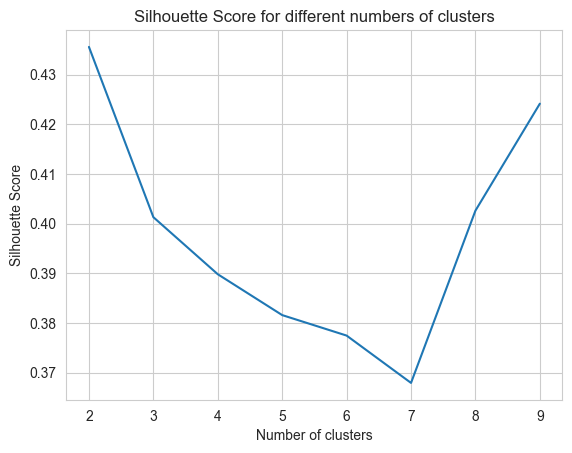

In [13]:
from sklearn.metrics import silhouette_score

# Пример метода силуэта
silhouette_scores = []
range_n_clusters = list(range(2, 10))  # Пример для числа кластеров от 2 до 9

for n_clusters in range_n_clusters:
    cluster_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(x_data)
    silhouette_avg = silhouette_score(x_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, the average silhouette score is {silhouette_avg}")

# Визуализация
plt.plot(range_n_clusters, silhouette_scores)
plt.title("Silhouette Score for different numbers of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()